# In-class activity 1: Image Preprocessing 1

## • Load an image file

(1249, 1280, 3)
<class 'numpy.ndarray'>


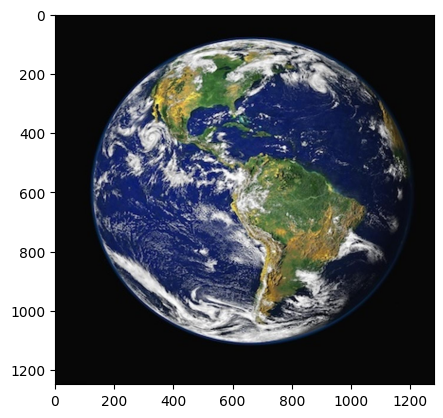

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray

img = Image.open("data/image.jpg")
arr_img = asarray(img)

print(arr_img.shape)
print(type(arr_img))
plt.imshow(arr_img)

## • RGB image and channel visualization

shape:  (1249, 1280, 3)
type:  <class 'numpy.ndarray'>


(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

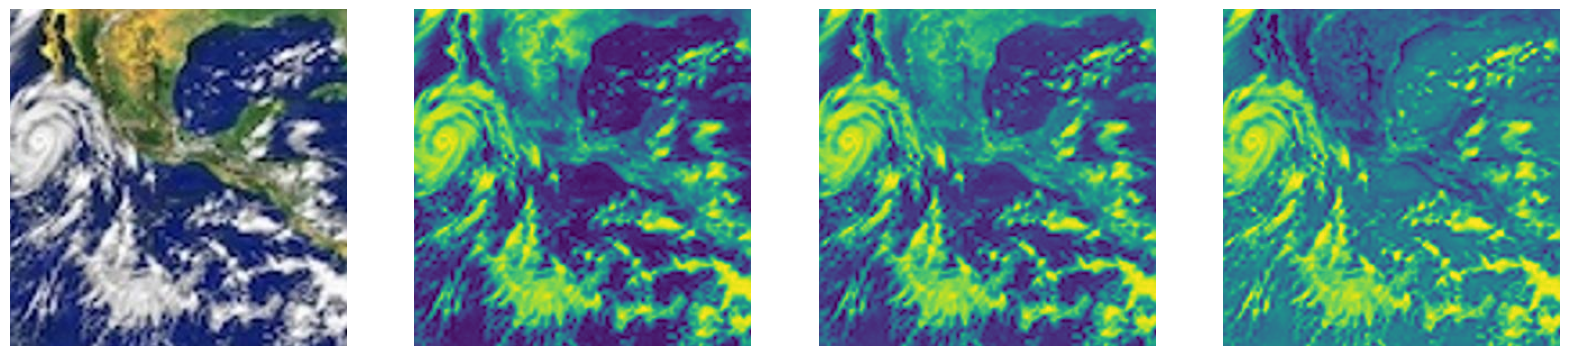

In [17]:
plt.figure(figsize=(20, 5))

print('shape: ', arr_img.shape)
print('type: ', type(arr_img))

plt.subplot(141)
plt.imshow(arr_img[300:600, 300:600, :])
plt.axis("off")

plt.subplot(142)
plt.imshow(arr_img[300:600, 300:600, 0])
plt.axis("off")

plt.subplot(143)
plt.imshow(arr_img[300:600, 300:600, 1])
plt.axis("off")

plt.subplot(144)
plt.imshow(arr_img[300:600, 300:600, 2])
plt.axis("off")




## • Grayscale conversion and display

<class 'numpy.ndarray'>
(1249, 1280)


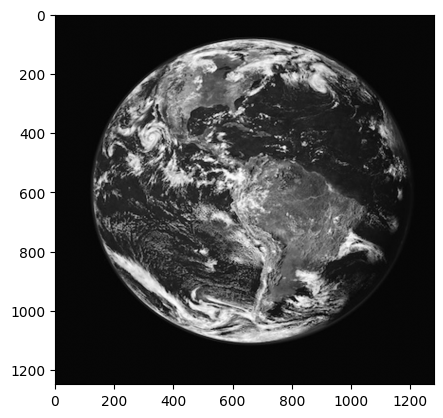

In [18]:
img = Image.open("data/image.jpg").convert('L')
arr_img = asarray(img)

print(type(arr_img))
print(arr_img.shape)

plt.imshow(arr_img, cmap = 'gray')

## • Resize and rotate

(1280, 1249)
(300, 300)


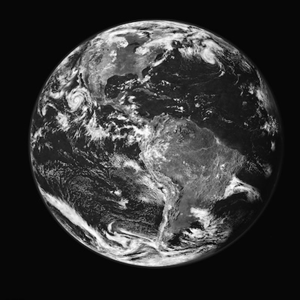

In [19]:
print(img.size)

img2 = img.resize((300, 300))
print(img2.size)
img2

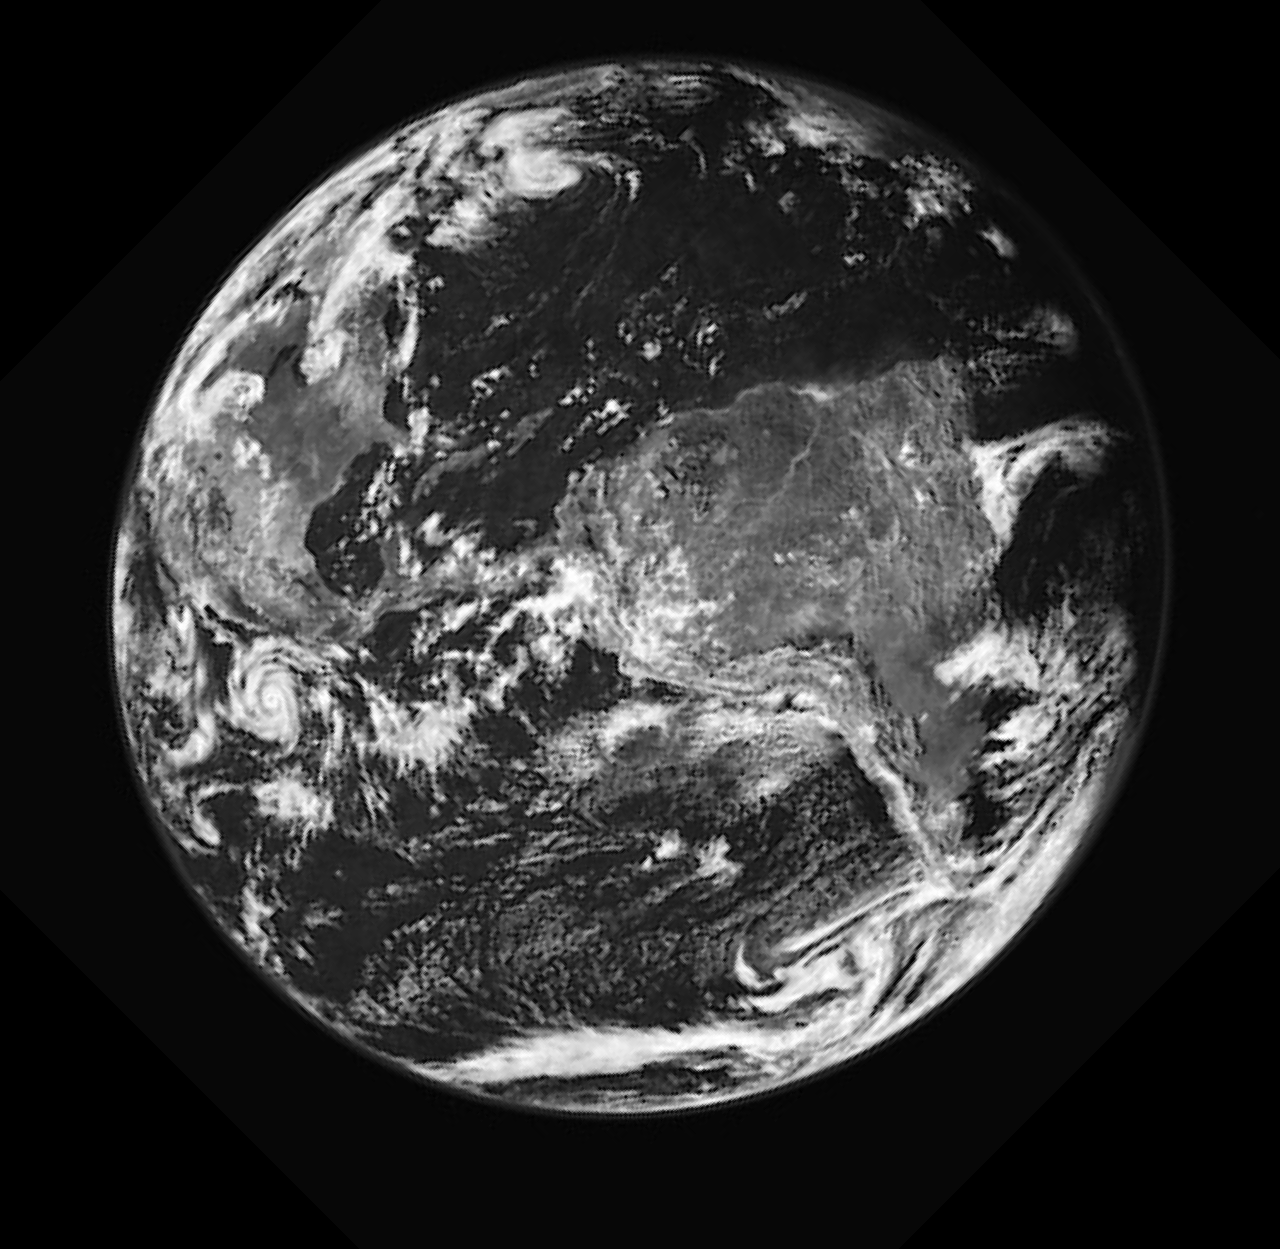

In [20]:
img3 = img.rotate(45)
img3

# In-class activity 2: Image Preprocessing 2

## • Filtering with 3 × 3 kernels

In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_filter_color(image, kernel):
    h, w, c = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0,0)), mode = 'reflect')
    output = np.zeros_like(image, dtype = np.float32)

    kernel_flipped = np.flipud(np.fliplr(kernel))

    for ch in range(c):
        for i in range(h):
            for j in range(w):
                region = padded[i:i+kh, j:j+kw, ch]
                output[i, j, ch] = np.sum(region * kernel_flipped)

    return np.clip(output, 0, 255).astype(np.uint8)

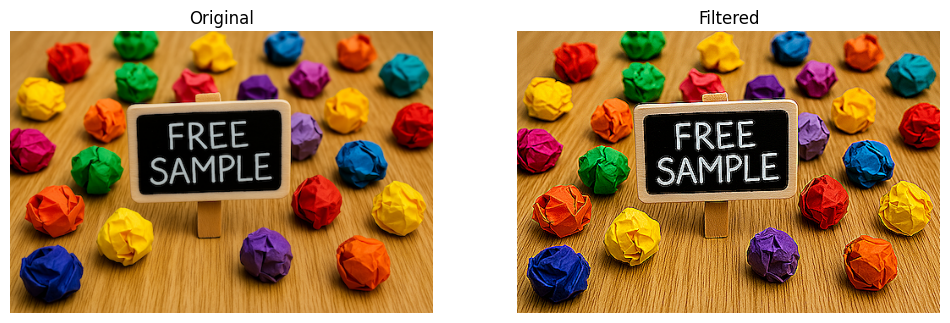

In [22]:
image_path = "data/paperballs.png"
img = Image.open(image_path)
img_np = np.array(img)

sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

filtered_img = apply_filter_color(img_np, sharpen_kernel)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title("Original")
plt.imshow(img_np)
plt.axis("off")

plt.subplot(122)
plt.title("Filtered")
plt.imshow(filtered_img)
plt.axis("off")

plt.show()

# In-class activity 3: MNIST

## • Load data (we’ve packed it for you)

In [23]:
import pickle
import pandas as pd

print('loading data...')
with open('data/mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding= 'latin1')

loading data...


In [24]:
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns= ['label'])
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns= ['label'])

train_data = pd.concat([train_x, train_y], axis = 1)
test_data = pd.concat([test_x, test_y], axis = 1)

print(train_data.shape, test_data.shape)

(50000, 785) (10000, 785)


## • Check data

In [25]:
print(train_data.shape)
train_data.head()

(50000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


## • Plotting sample images

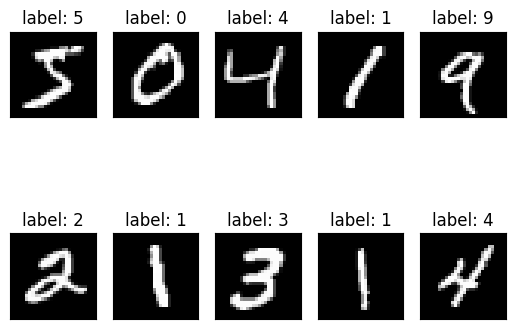

In [26]:
subset_images_X = train_data.iloc[:10, :-1]
subset_images_Y = train_data.iloc[:10, -1]

for i, row in subset_images_X.iterrows():
    ax = plt.subplot(2, 5, i+1)
    pixels = row.values.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.title('label: {}'.format(subset_images_Y[i]))
    plt.xticks([])
    plt.yticks([])

# In-class activity 4: Dimensionality Reduction with PCA

## • PCA of image data (MNIST; 784-dim → 2-dim)

In [27]:
train_x = train_data.iloc[:, :-1]
train_y = train_data.iloc[:, -1]

train_x = train_x - np.mean(train_x, axis = 0)

cov_matrix = np.cov(train_x.T)

eig_val, eig_vec = np.linalg.eig(cov_matrix)

eig_vec = eig_vec.T

print('20 eigenvalues of 784 eigenvalues: ', eig_val[:20])
print('val: ', eig_val.shape)
print('vec: ', eig_vec.shape)

20 eigenvalues of 784 eigenvalues:  [5.10829281+0.j 3.70097988+0.j 3.25867821+0.j 2.82008442+0.j
 2.54673473+0.j 2.26446711+0.j 1.71820046+0.j 1.51312696+0.j
 1.45150444+0.j 1.24028893+0.j 1.10062981+0.j 1.05915625+0.j
 0.89946813+0.j 0.88164617+0.j 0.8278981 +0.j 0.78254504+0.j
 0.69102204+0.j 0.66920675+0.j 0.62200547+0.j 0.60339874+0.j]
val:  (784,)
vec:  (784, 784)


## • PCA of image data (MNIST; 784-dim → 2-dim)

### • Visualize eigenvectors (top 2 eigenvectors)

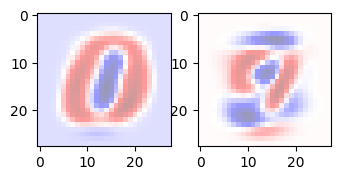

In [28]:
good_vecs = eig_vec[:2].real

plt.figure(figsize=(10,5))
for i, vec in enumerate(good_vecs):
    vec = vec.reshape((28, 28))
    ax = plt.subplot(2, 5, i+1)
    fig = plt.imshow(vec, alpha= 0.4, cmap = 'seismic')

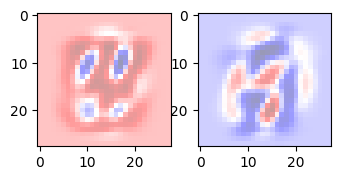

In [29]:
bad_vecs = eig_vec[10:12].real

plt.figure(figsize=(10,5))
for i, vec in enumerate(bad_vecs):
    vec = vec.reshape((28, 28))
    ax = plt.subplot(2, 5, i+1)
    fig = plt.imshow(vec, alpha= 0.4, cmap = 'seismic')

### • Visualize eigenvectors (less significant ones)

### • Project data onto the principal components

In [30]:
train_data.head(3)

projected_x = train_x.dot(eig_vec[0:2].T).to_numpy()
print("new data points' shape: ", train_x.shape, "x", eig_vec[0:2].T.shape, "=", projected_x.shape)
print("projected_x.shape: ", projected_x.shape, "train_y.shape",train_y.shape)

new_coordinates = np.vstack((projected_x.T, train_y)).T.real
dataframe = pd.DataFrame(data=new_coordinates, columns= ["1st_pca", "2nd_pca", "label"])
dataframe.head(3)

new data points' shape:  (50000, 784) x (784, 2) = (50000, 2)
projected_x.shape:  (50000, 2) train_y.shape (50000,)


,1st_pca,2nd_pca,label
0,0.461510,-1.246865,5.0
1,3.921652,-1.251651,0.0
2,-0.203711,1.547883,4.0
